# Import necessary dependencies

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.listdir()

['.ipynb_checkpoints',
 '13996_18858_bundle_archive.zip',
 'customer churn prediction using ann.ipynb',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv']

# Load data

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Take a look

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Shape of data

In [5]:
df.shape

(7043, 21)

# Drop customer id column, because its not necessary to classify

In [6]:
df.drop("customerID", axis=1, inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# here TotalCharges is object, we must convert it to numeric

In [7]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

# Using errors=’coerce’. It will replace all non-numeric values with NaN

In [9]:
pd.to_numeric(df.TotalCharges, errors="coerce")

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

# null values shape

In [10]:
df[pd.to_numeric(df.TotalCharges, errors="coerce").isnull()].shape

(11, 20)

In [11]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

# TotalCharges which is not " "

In [12]:
df1 = df[df.TotalCharges!=" "]
df1.shape

(7032, 20)

# Dataset types

In [13]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# TotalCharges convert to numeric

In [14]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

c:\users\it park\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# Again check data types

In [15]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Churn based on tenure
# visualize tenure

c:\users\it park\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


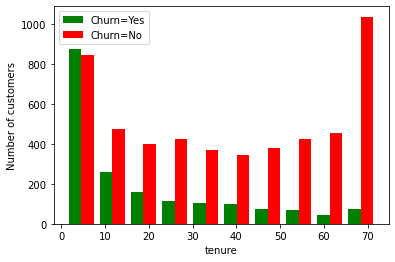

In [16]:
tenure_churn_no = df1[df1.Churn == "No"].tenure
tenure_churn_yes = df1[df1.Churn == "Yes"].tenure
plt.xlabel("tenure")
plt.ylabel("Number of customers")
plt.hist([tenure_churn_yes, tenure_churn_no], color=["green", "red"], label=["Churn=Yes", "Churn=No"])
plt.legend()

# MonthlyCharges based on Churn
# plot MonthlyCHarges

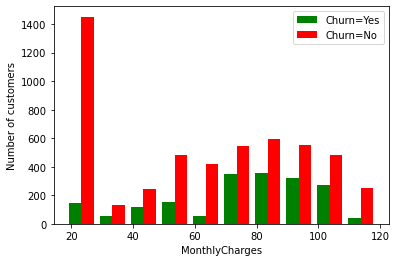

In [17]:
MonthlyCharges_churn_no = df1[df1.Churn == "No"].MonthlyCharges
MonthlyCharges_churn_yes = df1[df1.Churn == "Yes"].MonthlyCharges
plt.xlabel("MonthlyCharges")
plt.ylabel("Number of customers")
plt.hist([MonthlyCharges_churn_yes, MonthlyCharges_churn_no], color=["green", "red"], label=["Churn=Yes", "Churn=No"])
plt.legend()

# function for unique values in object type columns

In [18]:
def print_uniue_col_values(df):
    for column in df:
        if df[column].dtypes == "object":
            print(f"{column} : {df[column].unique()}")

In [19]:
print_uniue_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


# No internet service, No phone service same as No

In [20]:
df1.replace("No internet service", "No", inplace=True)
df1.replace("No phone service", "No", inplace=True)

c:\users\it park\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [21]:
print_uniue_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


# Convert Yes=1, No=0

In [22]:
yesy_no_columns = ["Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity", 
                   "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
                   "PaperlessBilling", "Churn"]

for col in yesy_no_columns:
    df1[col].replace({"Yes": 1, "No": 0}, inplace=True)

c:\users\it park\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [23]:
for col in df1:
    print(df1[col].unique())

['Female' 'Male']
[0 1]
[1 0]
[0 1]
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
[0 1]
[0 1]
['DSL' 'Fiber optic' 'No']
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
['Month-to-month' 'One year' 'Two year']
[1 0]
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
[0 1]


# Gender Female = 1, Male = 0

In [24]:
df1["gender"].replace({"Female": 1, "Male": 0}, inplace=True)

# get_dummies() function is used to convert categorical variable into dummy/indicator variables

In [25]:
df2 = pd.get_dummies(data=df1, columns=["InternetService", "Contract", "PaymentMethod"])
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1315,1,0,1,1,11,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
6605,0,1,0,0,66,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
3609,1,0,0,0,61,1,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0
5707,1,0,0,0,2,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


# Take a look

In [26]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

# scaling some columns

In [27]:
cols_scale = ["tenure", "MonthlyCharges", "TotalCharges"]

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

df2[cols_scale] = scale.fit_transform(df2[cols_scale])

# Separate label and feature

In [28]:
X = df2.drop("Churn", axis=1)
y = df2["Churn"].copy()

# Train, Test, Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Train Model

Epoch 1/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4975 - accuracy: 0.7348 - val_loss: 0.4575 - val_accuracy: 0.7768
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4357 - accuracy: 0.7904 - val_loss: 0.4525 - val_accuracy: 0.7747
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4282 - accuracy: 0.8007 - val_loss: 0.4677 - val_accuracy: 0.7733
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4267 - accuracy: 0.8016 - val_loss: 0.4424 - val_accuracy: 0.7804
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4194 - accuracy: 0.8064 - val_loss: 0.4482 - val_accuracy: 0.7697
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4120 - accuracy: 0.8105 - val_loss: 0.4381 - val_accuracy: 0.7882
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4090 - accuracy: 0.8069 - val_loss: 0.4447 - val_accuracy: 0.7839

Epoch 58/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3006 - accuracy: 0.8656 - val_loss: 0.5864 - val_accuracy: 0.7392
Epoch 59/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3035 - accuracy: 0.8626 - val_loss: 0.5645 - val_accuracy: 0.7512
Epoch 60/100
176/176 [==============================] - 1s 4ms/step - loss: 0.2969 - accuracy: 0.8677 - val_loss: 0.5901 - val_accuracy: 0.7569
Epoch 61/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3047 - accuracy: 0.8610 - val_loss: 0.5732 - val_accuracy: 0.7626
Epoch 62/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3025 - accuracy: 0.8668 - val_loss: 0.6013 - val_accuracy: 0.7491
Epoch 63/100
176/176 [==============================] - 1s 3ms/step - loss: 0.2983 - accuracy: 0.8668 - val_loss: 0.6107 - val_accuracy: 0.7413
Epoch 64/100
176/176 [==============================] - 1s 3ms/step - loss: 0.2950 - accuracy: 0.8706 - val_loss: 0.6266 - val_accuracy:

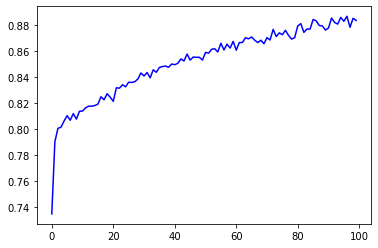

In [30]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation="relu"),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid"),
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

accuracy = history.history["accuracy"]
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label="train accuracy")

# Evalute test

In [31]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.7499 - accuracy: 0.7399


[0.749874472618103, 0.7398720979690552]

# Predict first five

In [32]:
yp = model.predict(X_test)
yp[:5]

array([[9.7125769e-04],
       [6.5297425e-02],
       [9.9016702e-01],
       [4.2298436e-04],
       [9.6419517e-06]], dtype=float32)

# If prediction is greater than 0.5 then it will be 1, else 0

In [33]:
y_pred = []
for ele in yp:
    if ele > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [34]:
y_pred[:10]

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]

# Classification Report and Confusion Matrix

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1033
           1       0.51      0.50      0.51       374

    accuracy                           0.74      1407
   macro avg       0.67      0.66      0.66      1407
weighted avg       0.74      0.74      0.74      1407



Text(33.0, 0.5, 'Truth')

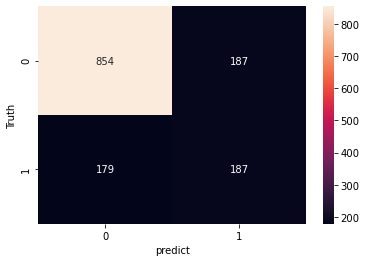

In [36]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d")
plt.xlabel("predict")
plt.ylabel("Truth")